IMPORT LIBRARIES 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

IMPORT DATASET

In [2]:
movie = pd.read_csv("C:/Users/mansi/OneDrive/Documents/CAPSTONE_PROJECT_DATASETS/3_Movie_sentiment_PR3_BIA/IMDB Dataset.csv")
movie.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
movie.shape

(50000, 2)

In [4]:
movie.size

100000

CLEAN

In [5]:
movie.isnull().sum()

review       0
sentiment    0
dtype: int64

In [6]:
movie.duplicated().sum()

418

In [7]:
movie.drop_duplicates(inplace=True)

In [8]:
movie.duplicated().sum()

0

In [9]:
movie['sentiment'].value_counts()

sentiment
positive    24884
negative    24698
Name: count, dtype: int64

In [10]:
# Almost Sentiment Type Positive  & Negative is balanced 

In [11]:
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [12]:
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Text Preprocessing Function
def preprocess_text(review):
    text = BeautifulSoup(review, 'html.parser').get_text()  # Remove HTML tags
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove non-word characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    words = nltk.word_tokenize(text)  # Tokenize text into words
    words = [stemmer.stem(word) for word in words if word not in stop_words]  # Stem words and remove stop words
    return ' '.join(words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mansi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mansi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
# Apply preprocessing to the entire dataset before splitting
movie['revie_preprocess'] = movie['review'].apply(preprocess_text)

C:\Users\mansi\AppData\Local\Temp\ipykernel_16296\228269972.py:8: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(review, 'html.parser').get_text()  # Remove HTML tags


In [14]:
movie.head(4)

,review,sentiment,revie_preprocess
0,One of the other reviewers has mentioned that ...,positive,one review mention watch 1 oz episod hook righ...
1,A wonderful little production. <br /><br />The...,positive,wonder littl product film techniqu unassum old...
2,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,negative,basic famili littl boy jake think zombi closet...


In [15]:
movie['sentiment'] = movie['sentiment'].map({'positive': 1, 'negative': 0})

In [16]:
movie['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [17]:
movie['revie_preprocess'][0]

'one review mention watch 1 oz episod hook right exactli happen first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that get touch darker side'

DATA VISUALIZATIONS 

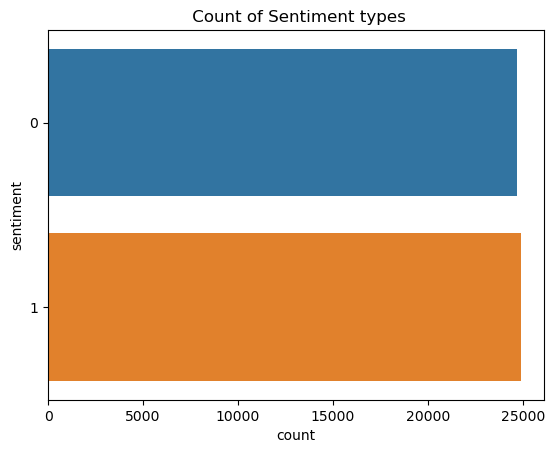

In [18]:
sns.countplot(data=movie , y='sentiment')
plt.title(" Count of Sentiment types")
plt.show()

In [19]:
movie['review_len'] =movie['review'].apply(len)
movie['revie_preprocess_len'] =movie['revie_preprocess'].apply(len)

C:\Users\mansi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mansi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


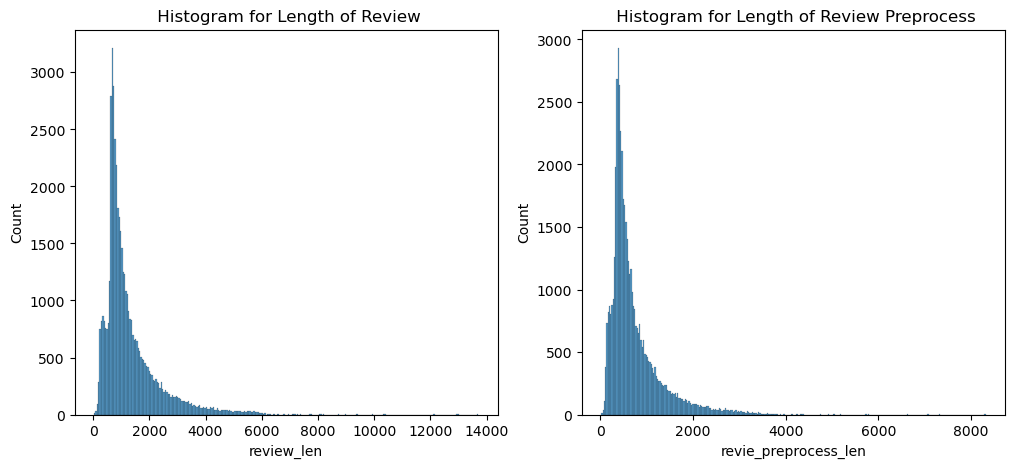

In [20]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data= movie, x ='review_len')
plt.title(" Histogram for Length of Review")

plt.subplot(1, 2, 2)
sns.histplot(data= movie, x ='revie_preprocess_len')
plt.title(" Histogram for Length of Review Preprocess")
plt.show()

In [21]:
# Preprocess helps to reduce the length of text

In [22]:
from wordcloud import WordCloud
# Separate positive and negative reviews
positive_reviews = movie[movie['sentiment'] == 1]['review'].str.cat(sep=' ')
negative_reviews = movie[movie['sentiment'] == 0]['review'].str.cat(sep=' ')
# Create WordCloud for positive reviews
wordcloud_positive = WordCloud(max_words=20, background_color="white").generate(positive_reviews)
# Create WordCloud for negative reviews
wordcloud_negative = WordCloud(max_words=20, background_color="white").generate(negative_reviews)

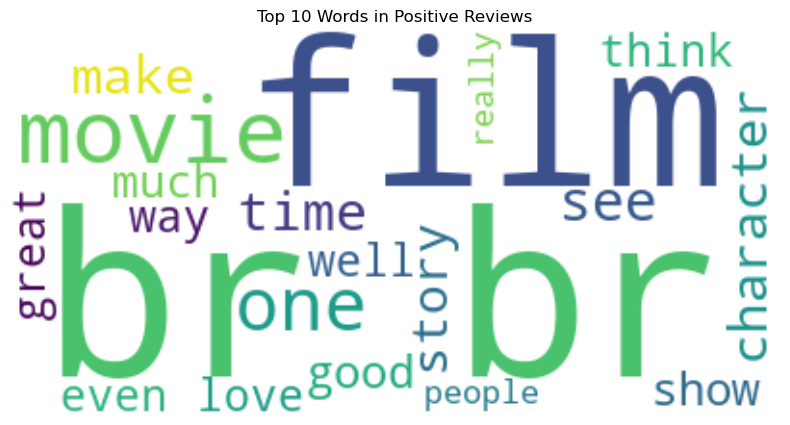

In [23]:
# Plot WordCloud for positive reviews
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Top 10 Words in Positive Reviews')
plt.show()

In [24]:
# Top 20 Positive words

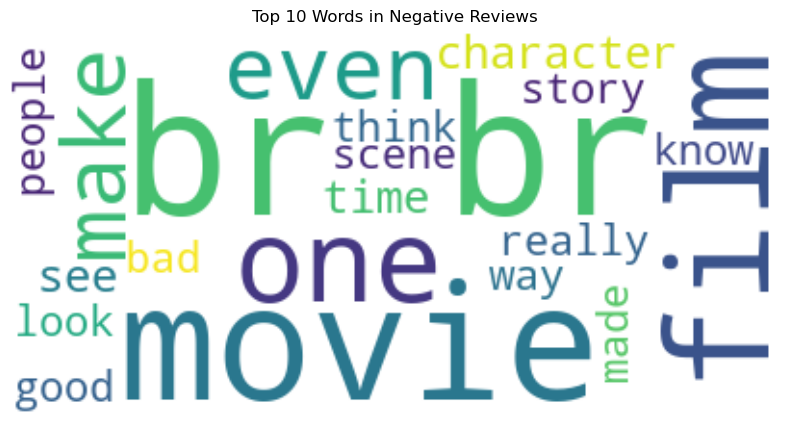

In [25]:
# Plot WordCloud for negative reviews
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Top 10 Words in Negative Reviews')
plt.show()

In [26]:
# Top 20 Negative words

In [27]:
# Split dataset 
X = movie['revie_preprocess']
y = movie['sentiment']  #

In [28]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenization and Padding
max_words = 5000  # Maximum number of words to keep in the vocabulary
max_len = 100     # Maximum length of sequences (reviews)

In [29]:
# Print the shape of each set
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (39665,)
X_test shape: (9917,)
y_train shape: (39665,)
y_test shape: (9917,)


In [30]:
# Initialize the tokenizer
max_words = 5000  # Maximum number of words to keep in the vocabulary
tokenizer = Tokenizer(num_words=max_words)
# Fit the tokenizer on the training data
tokenizer.fit_on_texts(X_train)

In [31]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [32]:
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

                                                                    NLP 

1-- LSTM MODEL

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
# LSTM Model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
lstm_model.add(LSTM(64, return_sequences=False))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(1, activation='sigmoid'))
# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Print the model summary
lstm_model.summary()

C:\Users\mansi\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [34]:
# Train the model and save the history
lstm_history = lstm_model.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_data=(X_test_padded, y_test))

Epoch 1/5
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 61s 47ms/step - accuracy: 0.6623 - loss: 0.5968 - val_accuracy: 0.5980 - val_loss: 0.6357
Epoch 2/5
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 56s 45ms/step - accuracy: 0.6045 - loss: 0.6293 - val_accuracy: 0.7813 - val_loss: 0.4942
Epoch 3/5
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 77s 41ms/step - accuracy: 0.8452 - loss: 0.4041 - val_accuracy: 0.8632 - val_loss: 0.3352
Epoch 4/5
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 53s 43ms/step - accuracy: 0.8994 - loss: 0.2756 - val_accuracy: 0.8639 - val_loss: 0.3429
Epoch 5/5
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 87s 47ms/step - accuracy: 0.9219 - loss: 0.2188 - val_accuracy: 0.8685 - val_loss: 0.3334


In [35]:
# Evaluate the model
loss, accuracy = lstm_model.evaluate(X_test_padded, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

310/310 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.8693 - loss: 0.3309
Test Accuracy: 0.87


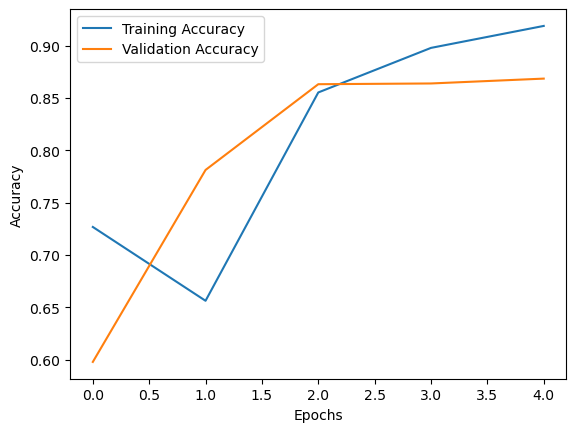

In [36]:
plt.plot(lstm_history.history['accuracy'], label='Training Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [37]:
from tensorflow.keras.callbacks import EarlyStopping
# Define the Sequential model
lstm_model = Sequential()
# Add layers to the model
lstm_model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
lstm_model.add(LSTM(units=64, return_sequences=False)) # LSTM layer
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Print the model summary
lstm_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [38]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True,verbose=1)
# Train the model
lstm_history = lstm_model.fit(X_train_padded, y_train, epochs=7, batch_size=32,validation_data=(X_test_padded, y_test),callbacks=[early_stopping])

Epoch 1/7
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 56s 43ms/step - accuracy: 0.6332 - loss: 0.6300 - val_accuracy: 0.6256 - val_loss: 0.6185
Epoch 2/7
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 80s 41ms/step - accuracy: 0.7381 - loss: 0.5489 - val_accuracy: 0.6767 - val_loss: 0.5981
Epoch 3/7
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 54s 44ms/step - accuracy: 0.8038 - loss: 0.4486 - val_accuracy: 0.8748 - val_loss: 0.3032
Epoch 4/7
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 58s 47ms/step - accuracy: 0.9042 - loss: 0.2589 - val_accuracy: 0.8818 - val_loss: 0.3000
Epoch 5/7
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 58s 47ms/step - accuracy: 0.9201 - loss: 0.2143 - val_accuracy: 0.8786 - val_loss: 0.3087
Epoch 6/7
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 55s 44ms/step - accuracy: 0.9417 - loss: 0.1678 - val_accuracy: 0.8725 - val_loss: 0.3456
Epoch 7/7
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 79s 41ms/step - accuracy: 0.9568 - loss: 0.1367 - val_accuracy: 0.8734 - val_loss: 0.3483
Epoch 7: early stopping
Restoring model weights from the end of the best epoch: 4.


In [ ]:
# Best epoch is 4 of lstm , comapre to all other model so running again with 4 epochs

In [55]:
# Train the model with 4 epoch
lstm_history = lstm_model.fit(X_train_padded, y_train, epochs=4, batch_size=32,validation_data=(X_test_padded, y_test))

Epoch 1/4
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 52s 42ms/step - accuracy: 0.8810 - loss: 0.2880 - val_accuracy: 0.8769 - val_loss: 0.3146
Epoch 2/4
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 54s 44ms/step - accuracy: 0.9240 - loss: 0.2223 - val_accuracy: 0.8755 - val_loss: 0.3181
Epoch 3/4
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 79s 41ms/step - accuracy: 0.9362 - loss: 0.1863 - val_accuracy: 0.8706 - val_loss: 0.3481
Epoch 4/4
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 54s 44ms/step - accuracy: 0.9520 - loss: 0.1537 - val_accuracy: 0.8736 - val_loss: 0.3453


In [57]:
# Evaluate the model
loss, accuracy = lstm_model.evaluate(X_test_padded, y_test)
print(f" LSTM Test Accuracy: {accuracy:.2f}")

310/310 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8760 - loss: 0.3368
 LSTM Test Accuracy: 0.87


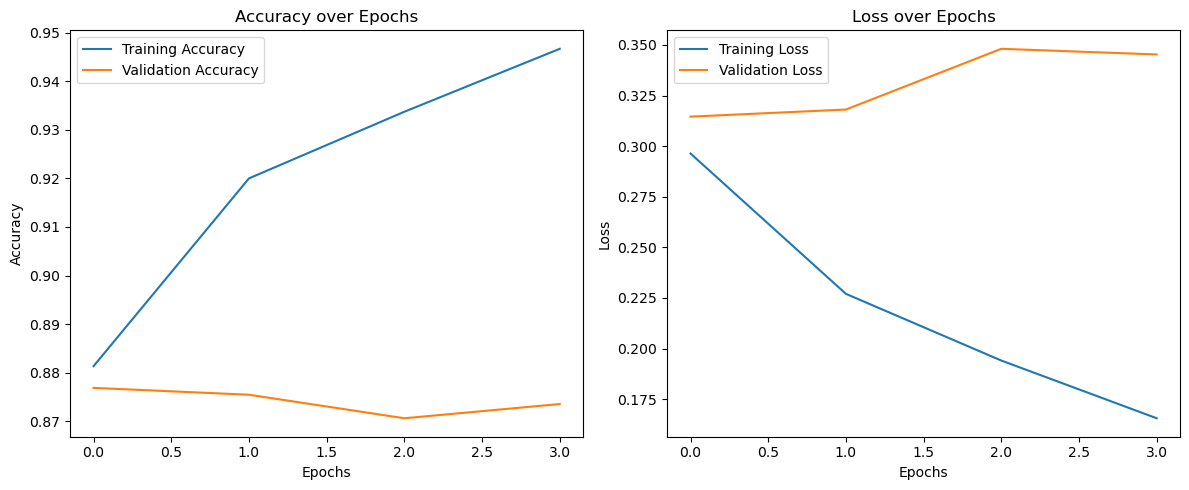

In [56]:
# Plot accuracy
plt.figure(figsize=(12, 5))
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['accuracy'], label='Training Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(lstm_history.history['loss'], label='Training Loss')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.tight_layout()
plt.show()

 LSTM Accuracy score is good

2 -- GRU MODEL

In [41]:
from tensorflow.keras.layers import  GRU
 #Define the GRU model
gru_model = Sequential()
# Add layers to the model
gru_model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
gru_model.add(GRU(64, return_sequences=False)) # GRU layer
gru_model.add(Dropout(0.5))
gru_model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
# Compile the model
gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
gru_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [42]:
# Define Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# Train the model
gru_history = gru_model.fit(X_train_padded, y_train, epochs=7, validation_data=(X_test_padded, y_test),callbacks=[early_stopping])

Epoch 1/7
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 73s 57ms/step - accuracy: 0.6335 - loss: 0.6247 - val_accuracy: 0.8292 - val_loss: 0.4149
Epoch 2/7
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 74s 60ms/step - accuracy: 0.8617 - loss: 0.3489 - val_accuracy: 0.8756 - val_loss: 0.2948
Epoch 3/7
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 69s 55ms/step - accuracy: 0.9094 - loss: 0.2346 - val_accuracy: 0.8840 - val_loss: 0.2844
Epoch 4/7
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 79s 53ms/step - accuracy: 0.9292 - loss: 0.1903 - val_accuracy: 0.8785 - val_loss: 0.3350
Epoch 5/7
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 83s 54ms/step - accuracy: 0.9471 - loss: 0.1473 - val_accuracy: 0.8748 - val_loss: 0.3364
Epoch 6/7
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 82s 54ms/step - accuracy: 0.9606 - loss: 0.1142 - val_accuracy: 0.8666 - val_loss: 0.3743


In [43]:
# Evaluate the model
loss, accuracy = gru_model.evaluate(X_test_padded, y_test)
print(f"GRU Test Accuracy: {accuracy:.2f}")

310/310 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8842 - loss: 0.2856
GRU Test Accuracy: 0.88


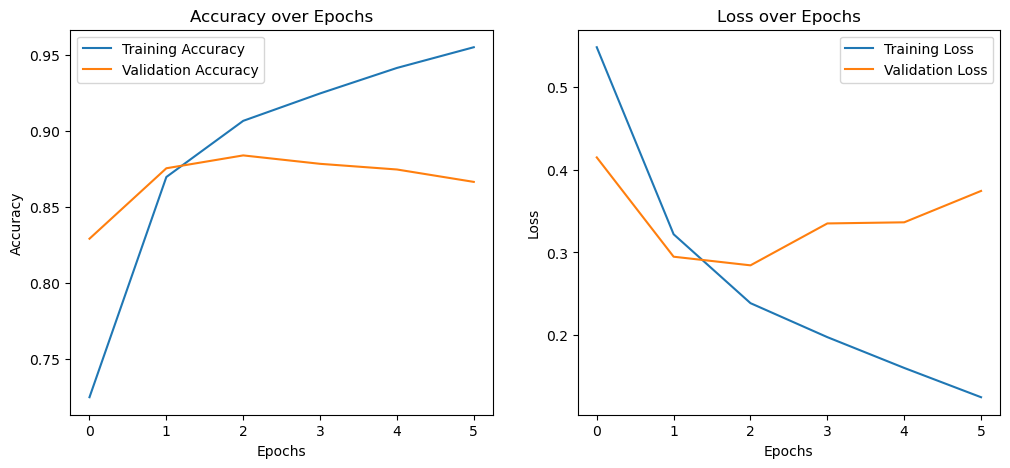

In [44]:
plt.figure(figsize=(12, 5))
# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(gru_history.history['accuracy'], label='Training Accuracy')
plt.plot(gru_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()
# Plot loss
plt.subplot(1, 2, 2)
plt.plot(gru_history.history['loss'], label='Training Loss')
plt.plot(gru_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

Accuracy is okay but validation score is not that good comapre to LSTM

3 -- RNN MODEL

In [45]:
from tensorflow.keras.layers import SimpleRNN
# Define RNN model
rnn_model = Sequential()
# Add layers to the model
rnn_model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
rnn_model.add(SimpleRNN(units=64, return_sequences=False))  # RNN layer
rnn_model.add(Dropout(0.5))
rnn_model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
# Compile the model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Print the model summary
rnn_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [46]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1)
# Train the model 
rnn_history = rnn_model.fit( X_train_padded, y_train,epochs=7,validation_data=(X_test_padded, y_test),callbacks=[early_stopping])

Epoch 1/7
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 37s 29ms/step - accuracy: 0.5285 - loss: 0.6974 - val_accuracy: 0.6311 - val_loss: 0.6560
Epoch 2/7
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 31s 25ms/step - accuracy: 0.6543 - loss: 0.6277 - val_accuracy: 0.5988 - val_loss: 0.6300
Epoch 3/7
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 31s 25ms/step - accuracy: 0.6268 - loss: 0.5936 - val_accuracy: 0.5476 - val_loss: 0.6697
Epoch 4/7
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.6102 - loss: 0.6205 - val_accuracy: 0.5565 - val_loss: 0.6723
Epoch 5/7
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 31s 25ms/step - accuracy: 0.6271 - loss: 0.6004 - val_accuracy: 0.5362 - val_loss: 0.6866
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 2.


In [47]:
# Evaluate the model
loss, accuracy = rnn_model.evaluate(X_test_padded, y_test)
print(f"RNN Test Accuracy: {accuracy:.2f}")

310/310 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6031 - loss: 0.6332
RNN Test Accuracy: 0.60


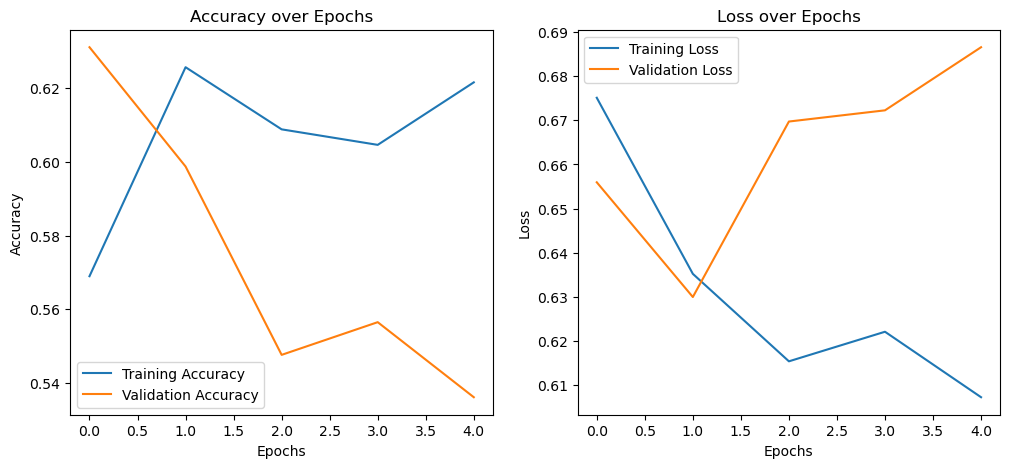

In [48]:
plt.figure(figsize=(12, 5))
# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(rnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(rnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()
# Plot loss
plt.subplot(1, 2, 2)
plt.plot(rnn_history.history['loss'], label='Training Loss')
plt.plot(rnn_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

RNN doesn't perform comapre to LSTM  & GRU

Out of all 3 model LSTM, GRU, RNN  LSTM score is good on  Training Data , Validation as well as for Test data 
LSTM Model is selected 

Testing the LSTM Model on new data

In [49]:
# Save the entire model to a file in the native Keras format
lstm_model.save('lstm_model.keras')

In [50]:
from tensorflow.keras.models import load_model
# Load the model
loaded_model = load_model('lstm_model.keras')

In [51]:
# Example review for testing
test_review = """This movie was a fantastic experience from start to finish! The storyline was engaging, and the performances were top-notch.
    The visuals were stunning, and the soundtrack perfectly complemented the emotional highs and lows. A must-watch for anyone looking for a 
    thrilling and heartfelt film."""

# Preprocess and prepare the test review
processed_review = preprocess_text(test_review)
review_seq = tokenizer.texts_to_sequences([processed_review])
review_padded = pad_sequences(review_seq, maxlen=max_len)

In [52]:
# Predict the sentiment of the test review
prediction = loaded_model.predict(review_padded)
sentiment = 'Positive' if prediction > 0.5 else 'Negative'
print(f"Predicted Sentiment: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
Predicted Sentiment: Negative


In [53]:
# Example review for testing
test_review = """Unfortunately, this movie did not live up to expectations. The plot was predictable, and the character development was lacking.
    The pacing felt slow, and the dialogue was often cringeworthy. Overall, it was a disappointing watch with little to offer beyond some nice
    visuals."""

# Preprocess and prepare the test review
processed_review = preprocess_text(test_review)
review_seq = tokenizer.texts_to_sequences([processed_review])
review_padded = pad_sequences(review_seq, maxlen=max_len)

In [54]:
# Predict the sentiment of the test review
prediction = loaded_model.predict(review_padded)
sentiment = 'Positive' if prediction > 0.5 else 'Negative'
print(f"Predicted Sentiment: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted Sentiment: Negative
